In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [4]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [6]:
X = data.data
y = data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score : ",r2_score(y_test, y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score :  0.5188113124539249
RMSE :  48.72713760953253


In [14]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.0001)

In [15]:
r.fit(X_train, y_train)

Ridge(alpha=0.0001)

In [16]:
y_pred = r.predict(X_test)

In [17]:
print("R2 Score : ",r2_score(y_test, y_pred))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score :  0.5189732635884963
RMSE :  48.7189370018195


# # Ridge Regression Own

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

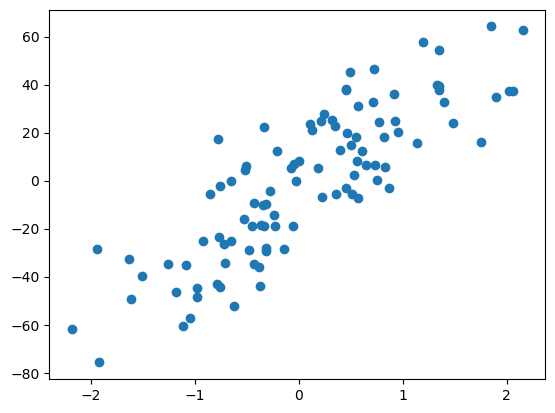

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_)

[27.82809103] -2.29474455867698


In [7]:
from sklearn.linear_model import Ridge

In [11]:
rr = Ridge(alpha = 10)
rr.fit(X, y)
print(rr.coef_, rr.intercept_)

[24.9546267] -2.1269130035235726


In [10]:
rr1 = Ridge(alpha = 100)
rr1.fit(X, y)
print(rr1.coef_, rr1.intercept_)

[12.93442104] -1.4248441496033308


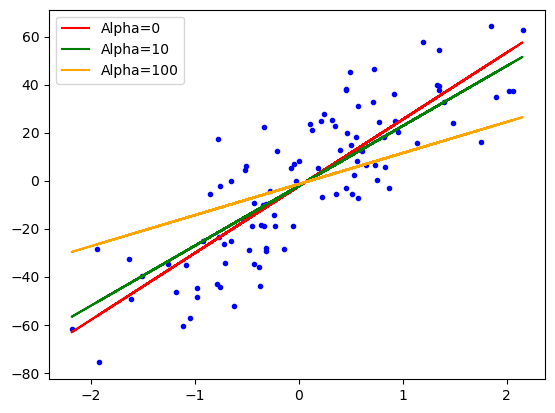

In [12]:
plt.plot(X, y, 'b.')
plt.plot(X, lr.predict(X), color="red",label="Alpha=0")
plt.plot(X, rr.predict(X), color="green",label="Alpha=10")
plt.plot(X, rr1.predict(X), color="orange",label="Alpha=100")
plt.legend()

In [18]:
class MeraRidge:
    
    def __init__(self, alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self, X_train, y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
        
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m* X_train.mean())
        
        print(self.m, self.b)
        
    def predict(self, X_test):
        return self.m * X_test + self.b
        

In [23]:
mr = MeraRidge(alpha=10)

In [24]:
mr.fit(X, y)

[24.9546267] [-2.126913]


# Creating Own RiDge own Multi Column data

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [6]:
from sklearn.linear_model import Ridge

In [7]:
reg = Ridge(alpha=0.1, solver='cholesky')

In [8]:
reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [9]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.46931288533098015

In [11]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [12]:
conda install conda-forge::jupyter_contrib_nbextensions

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\kapil\anaconda3

  added / updated specs:
    - conda-forge::jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter_contrib_core-0.4.0 |     pyhd8ed1ab_0          18 KB  conda-forge
    jupyter_contrib_nbextensions-0.7.0|     pyhd8ed1ab_0        20.4 MB  conda-forge
    jupyter_highlight_selected_word-0.2.0|  pyhd8ed1ab_1006          17 KB  conda-forge
    jupyter_latex_envs-1.4.6   |  pyhd8ed1ab_1002         735 KB  conda-forge
    jupyter_nbextensions_configurator-0.6.1|     pyhd8ed1ab_0         450 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        21.6 MB

The following NEW packages will be INSTALLED:

  jupyter_contrib_c~ conda-forge/n



==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




In [14]:
class MultiRidge:
    
    def __init__(self, alpha):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X_train, y_train):
        
        X_train = np.insert(X_train, 0 , 1, axis=1)
        I = np.identity(X_train.shape[1])
        
        result = np.linalg.inv(np.dot(X_train.T, X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
        
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
    

In [15]:
reg = MultiRidge(alpha = 0.1)

In [16]:
reg.fit(X_train, y_train)

In [17]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4692136155993192

In [18]:
print(reg.coef_)
print(reg.intercept_)

[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023167


In [1]:
!jupyter contrib nbextension install --user

[I 14:29:05 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 14:29:05 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 14:29:05 InstallContribNbextensionsApp] Installing C:\Users\kapil\anaconda3\Lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 14:29:05 InstallContribNbextensionsApp] Making directory: C:\Users\kapil\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 14:29:05 InstallContribNbextensionsApp] Copying: C:\Users\kapil\anaconda3\Lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\kapil\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 14:29:05 InstallContribNbextensionsApp] Copying: C:\Users\kapil\anaconda3\Lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\kapil\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 14:29:05 InstallContribNbe

In [4]:
!jupyter nbextension enable varInspector/main

Enabling notebook extension varInspector/main...
      - Validating: ok


## Using Gradient Descent

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [5]:
from sklearn.linear_model import SGDRegressor

In [8]:
reg = SGDRegressor(penalty='l2', max_iter=500, eta0=0.1, learning_rate='constant', alpha=0.001)

In [9]:
reg.fit(X_train, y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [10]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4073600772862427

In [11]:
print(reg.coef_)
print(reg.intercept_)

[  49.12822601 -152.96376136  363.47335178  269.75383786   -5.31936715
  -59.15437698 -166.58466424  135.50525684  327.33138925   98.78474028]
[139.46600875]


In [12]:
from sklearn.linear_model import Ridge

In [13]:
reg = Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [14]:
reg.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [15]:
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.4625010162200953

In [16]:
print(reg.coef_)
print(reg.intercept_)

[  34.52193964 -290.84082833  482.40183351  368.06788505 -852.44870996
  501.59162506  180.11113887  270.76336793  759.73536977   37.49137498]
151.10198522383362


In [21]:
class MeraGDRidge:
    
    def __init__(self, epochs, learning_rate, alpha=0.1):
        
        self.coef_ = None
        self.intercept_ = None
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        
    def fit(self, X_train, y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_=0
        
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
        
        
        
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_
    
    
    

In [22]:
reg = MeraGDRidge(epochs=500,alpha=0.001,learning_rate=0.005)

In [23]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260914
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713466
